In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
# Show the first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Check the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# No null values present

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# Target Variable - Score
# Predictor - Hours
# Both are continuous in nature
# We will use Simple Linear Regression to predict Scores with respect to Hours

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000189055BD430>,
      dtype=object)

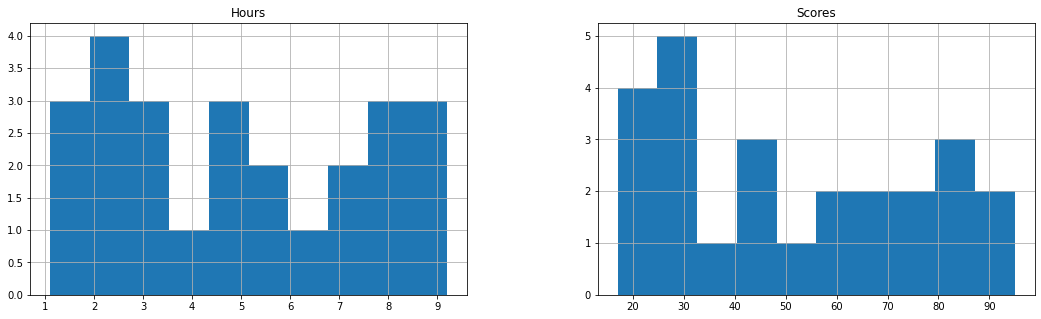

In [11]:
data.hist(['Hours', 'Scores'],figsize=(18,5))

In [12]:
# The distribution is comparable and good for ML model building

In [13]:
# Creating the correlation matrix
CorrelationData=data[['Hours','Scores']].corr()
CorrelationData

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [14]:
# Hours is strongly correlated with Scores

In [38]:
# Creating training and testing data
X = data.iloc[:,:-1].values  #independent variable array
y = data.iloc[:,1].values  #dependent variable vector

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
# Simple linear regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test) 
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [40]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [41]:
# Mean and median accuracy
Testing_result=pd.DataFrame(data=X_test, columns=["Hours"])
Testing_result['Scores']=y_test
Testing_result['Predicted_Scores']=y_pred

Testing_result['APE']=100*((abs(Testing_result['Scores']-Testing_result['Predicted_Scores']))/Testing_result['Scores'])

MAPE=np.mean(Testing_result['APE'])
MedianMAPE=np.median(Testing_result['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)


Mean Accuracy on test data: 87.43110838295433
Median Accuracy on test data: 89.31600414346758


In [42]:
# What will be predicted score if a student studies for 9.25 hrs/ day?

In [44]:
hours=[[9.25]]
pred=regressor.predict(hours)

In [52]:
print("No. of hours : {}".format(hours[0][0]))
print("Predicted Score : {}".format(np.round(pred[0])))

No. of hours : 9.25
Predicted Score : 94.0
